In [ ]:
#apps must be servable, or at least servable apps must be first

In [2]:
import panel as pn
import hvplot.pandas
import pandas as pd
import numpy as np

# share_info ex

In [11]:
import panel as pn
pn.extension()

In [12]:
from bokeh.plotting import figure

p1 = figure(width=300, height=300, name='Scatter')
p1.scatter([0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 2, 1, 0])

p2 = figure(width=300, height=300, name='Line')
p2.line([0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 2, 1, 0])

tabs = pn.Tabs(('Scatter', p1), p2, dynamic=True)
tabs.servable()

Tabs(dynamic=True)
    [0] Bokeh(figure, name='Scatter')
    [1] Bokeh(figure, name='Line')

In [46]:
import time
import numpy as np

def plot():
    time.sleep(1) # some long running calculation
    np.random.seed(tabs.active)
    xs, ys = np.random.randn(2, 100)
    p = figure(width=300, height=300, name=f'Scatter Seed {tabs.active}')
    p.scatter(xs, ys)
    return p

def plot1():
    time.sleep(1) # some long running calculation
    np.random.seed(tabs.active)
    print("plot1")
    xs, ys = np.random.randn(2, 100)
    p = figure(width=300, height=300, name=f'Scatter Seed {tabs.active}')
    p.scatter(xs, ys)
    return p

def plot2():
    time.sleep(1) # some long running calculation
    print("plot2")
    np.random.seed(tabs.active)
    xs, ys = np.random.randn(2, 100)
    p = figure(width=300, height=300, name=f'Scatter Seed {tabs.active}')
    p.scatter(xs, ys)
    return p

p1 = pn.param.ParamFunction(plot1, lazy=True, name='Seed 0')
p2 = pn.param.ParamFunction(plot2, lazy=True, name='Seed 1')
p3 = pn.param.ParamFunction(plot, lazy=True, name='Seed 2')

tabs = pn.Tabs(p1, p2, p3, dynamic=True,closable=True)

tabs.servable()

plot1


Tabs(closable=True, dynamic=True)
    [0] ParamFunction(function, _pane=Bokeh, defer_load=False, lazy=True, name='Seed 0')
    [1] ParamFunction(function, _pane=Str, defer_load=False, lazy=True, name='Seed 1')
    [2] ParamFunction(function, _pane=Str, defer_load=False, lazy=True, name='Seed 2')

# panel ex

In [1]:

pn.extension(design='material')

csv_file = ("https://raw.githubusercontent.com/holoviz/panel/main/examples/assets/occupancy.csv")
data = pd.read_csv(csv_file, parse_dates=["date"], index_col="date")

data.tail()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1
2015-02-10 09:33:00,21.10,36.2000,447.0,821.000000,0.005612,1


In [2]:
def transform_data(variable, window, sigma):
    ''' Calculates the rolling average and the outliers '''
    avg = data[variable].rolling(window=window).mean()
    residual = data[variable] - avg
    std = residual.rolling(window=window).std()
    outliers = np.abs(residual) > std * sigma
    return avg, avg[outliers]

def create_plot(variable="Temperature", window=30, sigma=10):
    ''' Plots the rolling average and the outliers '''
    avg, highlight = transform_data(variable, window, sigma)
    return avg.hvplot(height=300, width=400, legend=False) * highlight.hvplot.scatter(
        color="orange", padding=0.1, legend=False
    )

In [3]:
variable_widget = pn.widgets.Select(name="variable", value="Temperature", options=list(data.columns))
window_widget = pn.widgets.IntSlider(name="window", value=30, start=1, end=60)
sigma_widget = pn.widgets.IntSlider(name="sigma", value=10, start=0, end=20)

In [4]:
bound_plot = pn.bind(create_plot, variable=variable_widget, window=window_widget, sigma=sigma_widget)

In [ ]:
first_app = pn.Column(variable_widget, window_widget, sigma_widget, bound_plot)

first_app

# pym

In [7]:
import ipywidgets as widgets

pn.extension('ipywidgets')

In [8]:
from pycromanager import Core
#%matplotlib ipympl
import matplotlib.pyplot as plt

In [9]:
core = Core()

In [33]:
button = widgets.Button(description="Snap Image")
output = widgets.Output()


def on_button_clicked(b):
    with output:
        output.clear_output()
        core.snap_image()
        tagged_image = core.get_tagged_image()
        height = tagged_image.tags['Height']
        width = tagged_image.tags['Width']
        core.wait_for_system()
        pixels = np.reshape(tagged_image.pix,
                        newshape=[height, width, tagged_image.pix.shape[0]//(height*width)])
        plt.imshow(pixels)
        plt.show()
        #return pixels
        #output.

button.on_click(on_button_clicked)

app = pn.Row(button,output)
app.servable()

Row
    [0] IPyWidget(Button)
    [1] IPyWidget(Output)

TypeError: Invalid shape (0,) for image data

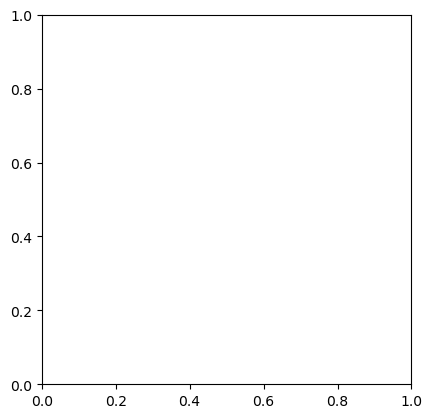

In [44]:
button1 = widgets.Button(description="Snap Image")
output = widgets.Output()

pixels=[]
def on_button_clicked1(b):
    with output:
        output.clear_output()
        core.snap_image()
        tagged_image = core.get_tagged_image()
        height = tagged_image.tags['Height']
        width = tagged_image.tags['Width']
        core.wait_for_system()
        pixels = np.reshape(tagged_image.pix,
                        newshape=[height, width, tagged_image.pix.shape[0]//(height*width)])
        #plt.imshow(pixels)
        #plt.show()
        #return pixels
        #output.

button1.on_click(on_button_clicked1)

mat =  pn.pane.Matplotlib(plt.imshow(pixels))
app = pn.Column(button1,mat)
app.servable()

In [ ]:
widgets.Output